In [1]:
%cd C:\Users\yukir\Documents\GitHub\Sign_Recognition\py

from basic_preprocessing import *
from deeplearning_check import *
from machine_learning import *

gpu_check()
set_global_determinism(seed=SEED)

import os
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import glob
import math
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
from IPython.display import Image

import tensorflow as tf
import os
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
import keras

#cv
import cv2
import math
from PIL import Image
import math
from scipy import ndimage
import argparse
import imutils
import xml.etree.ElementTree as ET

import random 
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize

#시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
get_ipython().run_line_magic('matplotlib', 'inline')

import matplotlib.image as mpimg
from matplotlib import font_manager, rc
rc('font',family="consolas")
plt.rcParams["font.family"]="consolas" #plt 한글꺠짐
plt.rcParams["font.family"]="Arial" #외국어꺠짐
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
plt.rc('figure', figsize=(10,8))

sns.set(font="consolas", 
        rc={"axes.unicode_minus":False},style='darkgrid')

%cd C:\Users\yukir\Documents\Monicas_workspace\Knee

C:\Users\yukir\Documents\GitHub\Sign_Recognition\py


Using TensorFlow backend.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8637402442403928037
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 18199761639926957951
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9883535296
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6483274537525996741
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 11813799951933329058
physical_device_desc: "device: XLA_GPU device"
]
tf 2.2.0
keras 2.3.0-tf
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
C:\Users\yukir\Documents\Monicas_workspace\Knee


In [2]:
set_global_determinism(seed=1337)

In [3]:
# process시각화 및 손실함수

def plot_it(history):
    '''function to plot training and validation error'''
    fig, ax = plt.subplots( figsize=(20,10))
    ax.plot(history.history['mae_in_months'])
    ax.plot(history.history['val_mae_in_months'])
    plt.title('Model Error')
    plt.ylabel('error')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    ax.grid(color='black')
    plt.show()
    fig = plt.gcf()
    fig.savefig("../03_model_visualization/"+model_name+".jpg")
    plt.close(fig)

### DATA

In [4]:
train_dir = 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\dataset\\vgg_dataset\\mask\\train'
test_dir = 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\dataset\\vgg_dataset\\mask\\test'
val_dir = 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\dataset\\vgg_dataset\\mask\\val'

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
from keras import Input
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=16, target_size=(224,224), color_mode='rgb')
val_generator = val_datagen.flow_from_directory(val_dir, batch_size=16, target_size=(224, 224), color_mode='rgb')
test_generator = test_datagen.flow_from_directory(test_dir,batch_size=16, target_size=(224, 224), color_mode='rgb')

input_tensor = Input(shape=(224, 224, 3), dtype='float32', name='input')

Found 5298 images belonging to 5 classes.
Found 1614 images belonging to 5 classes.
Found 1302 images belonging to 5 classes.


### MODEL

In [7]:
from tensorflow.keras.applications import VGG16

def create_model():
    optimizer = Adam()

    x_input = tf.keras.Input(shape=(224, 224, 3), name="x_input_node")
    x = Conv2D(kernel_size=(5, 5), filters=16, padding='same', use_bias=False, dilation_rate=2)(x_input)
    x = BatchNormalization()(x)
    x1 = PReLU()(x)

    short_cut = MaxPool2D(pool_size=(2, 3))(x1)
    x = Conv2D(kernel_size=(5, 5), filters=16, padding='same', use_bias=False, dilation_rate=2)(short_cut)
    x = BatchNormalization()(x)
    x2 = PReLU()(x) + short_cut


    short_cut = MaxPool2D(pool_size=(2, 3))(x2)
    x = Conv2D(kernel_size=(5, 5), filters=16, padding='same', use_bias=False, dilation_rate=2)(short_cut)
    x = BatchNormalization()(x)
    x3 = PReLU()(x) + short_cut


    short_cut = MaxPool2D(pool_size=(2, 3))(x3)
    x = Conv2D(kernel_size=(5, 5), filters=16, padding='same', use_bias=False, dilation_rate=2)(short_cut)
    x = BatchNormalization()(x)
    x4 = PReLU()(x) + short_cut


    x = Conv2D(kernel_size=(3, 3), filters=16, padding='same')(x4)
    x = BatchNormalization()(x)
    x = Conv2D(kernel_size=(3, 3), filters=8, padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(kernel_size=(3, 3), filters=5, padding='same')(x)
    x = BatchNormalization()(x)
    x = PReLU()(x)
    x = GlobalAveragePooling2D()(x)
    x = Softmax(name='output')(x)

    model = Model(x_input, x)

    model.compile(optimizer = optimizer, loss = keras.losses.categorical_crossentropy, metrics=['acc'])

    return model

In [8]:
# 모델 실행 옵션 
model = create_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x_input_node (InputLayer)       [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 224, 224, 16) 1200        x_input_node[0][0]               
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 224, 224, 16) 64          conv2d[0][0]                     
__________________________________________________________________________________________________
p_re_lu (PReLU)                 (None, 224, 224, 16) 802816      batch_normalization[0][0]        
______________________________________________________________________________________________

In [9]:
checkpoint_path = "check_point/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [11]:
#모델의 가중치 저장
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
            monitor='loss', 
            mode='min',
            save_best_only=True,
            save_weights_only=True,
            verbose=1)

#새로운 콜백으로 모델 훈련하기
history = model.fit_generator(train_generator, 
            steps_per_epoch=math.ceil(train_generator.n / train_generator.batch_size), 
            epochs=30, 
            validation_data=val_generator, 
            validation_steps=math.ceil(val_generator.n / val_generator.batch_size), 
            callbacks=[checkpoint],
            shuffle=False)

Epoch 1/30
331/332 [============================>.] - ETA: 0s - loss: 0.1045 - acc: 0.9709- ETA: 0s - loss: 0.1017 - ac
Epoch 00001: loss improved from inf to 0.10468, saving model to check_point/cp.ckpt
332/332 [==============================] - 19s 58ms/step - loss: 0.1047 - acc: 0.9707 - val_loss: 2.4691 - val_acc: 0.4176
Epoch 2/30
330/332 [============================>.] - ETA: 0s - loss: 0.1188 - acc: 0.9602- ETA: 1s - loss: 0.1217
Epoch 00002: loss did not improve from 0.10468
332/332 [==============================] - 21s 63ms/step - loss: 0.1185 - acc: 0.9604 - val_loss: 3.6032 - val_acc: 0.3848
Epoch 3/30
331/332 [============================>.] - ETA: 0s - loss: 0.0866 - acc: 0.9758
Epoch 00003: loss improved from 0.10468 to 0.08656, saving model to check_point/cp.ckpt
332/332 [==============================] - 20s 60ms/step - loss: 0.0866 - acc: 0.9758 - val_loss: 2.5722 - val_acc: 0.4715
Epoch 4/30
330/332 [============================>.] - ETA: 0s - loss: 0.0932 - acc: 0.

### RESULT

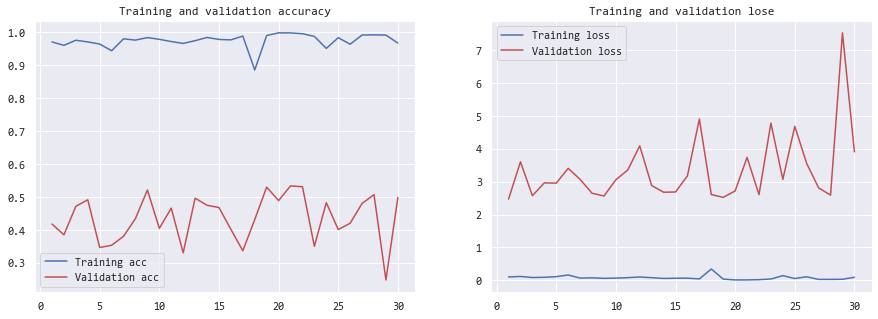

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)
    
    

fig = plt.figure()
fig.set_size_inches(15, 5)

fig.add_subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label ='Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# plt.figure()
fig.add_subplot(1, 2, 2) 
plt.plot(epochs, loss, 'b', label = "Training loss")
plt.plot(epochs, val_loss, 'r', label ='Validation loss')
plt.title('Training and validation lose')
plt.legend()

plt.show()

In [13]:
def print_info( test_gen, preds, print_code, save_dir, subject ):
    class_dict=test_gen.class_indices
    labels= test_gen.labels
    file_names= test_gen.filenames 
    error_list=[]
    true_class=[]
    pred_class=[]
    prob_list=[]
    new_dict={}
    error_indices=[]
    y_pred=[]
    for key,value in class_dict.items():
        new_dict[value]=key             # dictionary {integer of class number: string of class name}
    # store new_dict as a text fine in the save_dir
    classes=list(new_dict.values())     # list of string of class names
    classes=['0', '1', '2', '3', '4']
    print ('*** classes ', classes)
    dict_as_text=str(new_dict)
    dict_name= subject + '-' +str(len(classes)) +'.txt'  
    dict_path=os.path.join(save_dir,dict_name)    
    with open(dict_path, 'w') as x_file:
        x_file.write(dict_as_text)    
    errors=0      
    for i, p in enumerate(preds):
        pred_index=np.argmax(p)        
        true_index=labels[i]  # labels are integer values
        if pred_index != true_index: # a misclassification has occurred
            file_id=os.path.split(file_names[i])[1]
            error_list.append(file_id)
            true_class.append(new_dict[true_index])
            pred_class.append(new_dict[pred_index])
            prob_list.append(p[pred_index])
            error_indices.append(true_index)            
            errors=errors + 1
        y_pred.append(pred_index)    
    if print_code !=0:
        if errors>0:
            if print_code>errors:
                r=errors
            else:
                r=print_code           
            msg='{0:^28s}{1:^28s}{2:^28s}{3:^16s}'.format('Filename', 'Predicted Class' , 'True Class', 'Probability')
            print_in_color(msg, (0,255,0),(55,65,80))
            for i in range(r):
                msg='{0:^28s}{1:^28s}{2:^28s}{3:4s}{4:^6.4f}'.format(error_list[i], pred_class[i],true_class[i], ' ', prob_list[i])
                print_in_color(msg, (255,255,255), (55,65,60))
                #print(error_list[i]  , pred_class[i], true_class[i], prob_list[i])               
        else:
            msg='With accuracy of 100 % there are no errors to print'
            print_in_color(msg, (0,255,0),(55,65,80))
    if errors>0:
        plot_bar=[]
        plot_class=[]
        for  key, value in new_dict.items():        
            count=error_indices.count(key) 
            if count!=0:
                plot_bar.append(count) # list containg how many times a class c had an error
                plot_class.append(value)   # stores the class 
        fig=plt.figure()
        fig.set_figheight(len(plot_class)/3)
        fig.set_figwidth(10)
        plt.style.use('fivethirtyeight')
        for i in range(0, len(plot_class)):
            c=plot_class[i]
            x=plot_bar[i]
            plt.barh(c, x, )
            plt.title( ' Errors by Class on Test Set')
    if len(classes)<= 20:
        # create a confusion matrix and a test report        
        y_true= np.array(labels)        
        y_pred=np.array(y_pred)        
        cm = confusion_matrix(y_true, y_pred )
        clr = classification_report(y_true, y_pred, target_names=classes)
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width=length
            fig_height=length
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()    
        print("Classification Report:\n----------------------\n", clr)

In [14]:
save_dir = 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee'
subject='knees'

In [15]:
def print_in_color(txt_msg,fore_tupple,back_tupple,):
    #prints the text_msg in the foreground color specified by fore_tupple with the background specified by back_tupple 
    #text_msg is the text, fore_tupple is foregroud color tupple (r,g,b), back_tupple is background tupple (r,g,b)
    rf,gf,bf=fore_tupple
    rb,gb,bb=back_tupple
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m' 
    print(msg .format(mat), flush=True)
    print('\33[0m', flush=True) # returns default print color to back to black
    return

*** classes  ['0', '1', '2', '3', '4']
          Filename                Predicted Class                True Class           Probability   

   1_9008322R_masked.jpg                 2                           1                  0.5597

   1_9012435R_masked.jpg                 2                           1                  1.0000

   1_9016304L_masked.jpg                 3                           1                  0.9905

   1_9016403L_masked.jpg                 2                           1                  1.0000

   1_9017252R_masked.jpg                 0                           1                  0.9997

   1_9018291R_masked.jpg                 2                           1                  0.9030

   1_9019287R_masked.jpg                 2                           1                  0.6759

   1_9021428L_masked.jpg                 3                           1                  0.9997

   1_9025257R_masked.jpg                 3                           1                  0.9

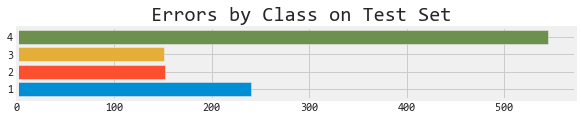

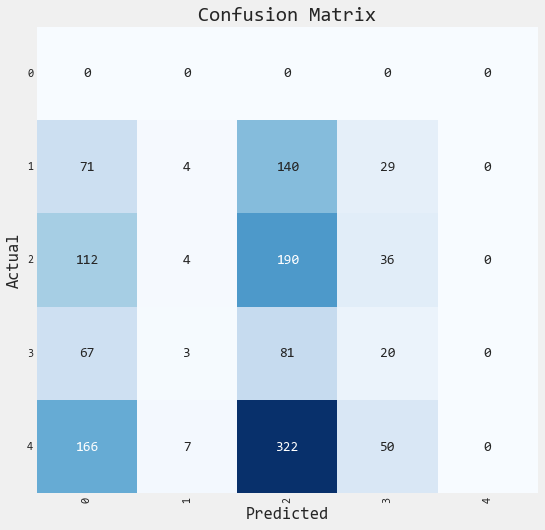

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.22      0.02      0.03       244
           2       0.26      0.56      0.35       342
           3       0.15      0.12      0.13       171
           4       0.00      0.00      0.00       545

    accuracy                           0.16      1302
   macro avg       0.13      0.14      0.10      1302
weighted avg       0.13      0.16      0.12      1302



In [16]:
preds=model.predict(test_generator, batch_size=16, verbose=0, steps=1302/16)
print_code=10
print_info( test_generator, preds, print_code, save_dir, subject ) 